<a href="https://colab.research.google.com/github/AMAYA-SAM/try/blob/master/Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

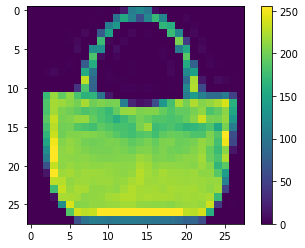

In [7]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

DATA PRE PROCESSING
divide by 255 to make it btw 0 and 1

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(108, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

hyper parameter tuning is observing how different our model behaves with different conditions


10 classes so 10 o/p ..flatten to get such a matrix

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=8)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2060 - accuracy: 0.9227
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2000 - accuracy: 0.9243
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1942 - accuracy: 0.9270
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1898 - accuracy: 0.9292
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1849 - accuracy: 0.9310
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1832 - accuracy: 0.9318
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1761 - accuracy: 0.9336
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1751 - accuracy: 0.9344


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8890
Test accuracy: 0.8889999985694885


In [0]:
predictions = model.predict(test_images)

In [26]:
predictions = model.predict(test_images)
print(predictions[0])

[1.5139459e-10 2.3015102e-14 6.7517374e-11 6.3659310e-14 2.4779163e-14
 3.0323149e-06 9.8871300e-10 1.5367948e-03 3.4353287e-10 9.9846017e-01]


In [30]:
np.argmax(predictions[0])

9

In [35]:
print(class_names[np.argmax(predictions[188])])

Coat


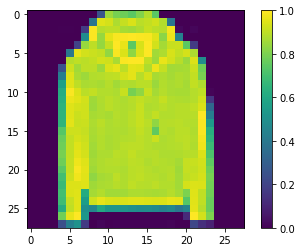

In [36]:
plt.figure()
plt.imshow(test_images[188])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 45


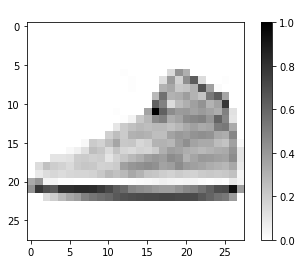

In [41]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)